<a href="https://colab.research.google.com/github/debayant9/ML-AI/blob/master/Text_Classification_%26_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Me:

Lavi Nigam 

Data Scientist @ Google

Working on Google Cloud AI Ecossytem 

Ex - Gartner, HCL Research

40 Under 40 Data Scientist India 2021 

8+ Years in ML, DL & AI


LinkedIn - https://www.linkedin.com/in/lavinigam/ 


In [ ]:
import pandas as pd

data = pd.read_csv("/content/tripadvisor_hotel_reviews 2.csv")

In [ ]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

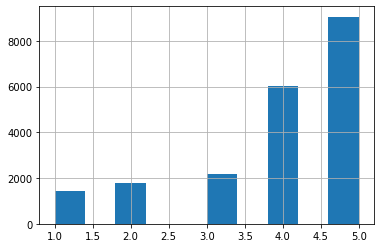

In [ ]:
data['Rating'].hist()

In [ ]:
# Should we take Rating as the sentiment?
   # We can divide the ratings as sentiments -
        # 4&5 ---> postive 
        # 3 --> Neutral 
        # 1,2 ---> Negative 
# or figure out sentiments from other libraries and use that as sentiment 
# or Hybrid Approach (Rating + Sentiment)

In [ ]:
data.describe(include="O")

,Review
count,20491
unique,20491
top,"forget negatives, wife 45 spent week starting ..."
freq,1


In [ ]:
# Pre-Processing or Cleansing of Text:
  # stemming & Lemmatization 
  # Punctunation Removal 
  # Stop Word Removal (Linguistic Features will be affected)
  # Spell COrrection 
  # All to Lowercase
  # Emoji Rmeovals or Extraction (* See if you can incorproate emojis in Sentiment calculation)
  # Remova of URL 
  # COntractions & Inflictions 
  # Remove numbers, date, Time and specific Hotel Domain data

# EDA 
# Analysis of Review Data 
  # WordClouds 
  # Positiv & Negative Words Analysis 
  # Sentence Length 
  # Word Counts 
  # NGram Analysis 
  # Extracting sentiment of the data 
  # Linguistic Data Extraction 
      # Count Number of Adjectives 
      # Noune Phrase Extraction 


In [ ]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# stopwords.words('english')

In [ ]:
eachRow_v1 = "this is my sentence or review "
word_list = ["this","is","my"]

In [ ]:
eachRow_v1.split()

['this', 'is', 'my', 'sentence', 'or', 'review']

In [ ]:
" ".join(eachRow_v1.split())

'this-is-my-sentence-or-review'

In [ ]:
eachRow_v1 = "this is my sentence or review "
word_list = eachRow_v1.split()
[word for word in word_list if word not in stopwords.words('english')]
# this return the review in list of words 
# this should be returened in Strings

['sentence', 'review']

In [ ]:
type(stopwords.words('english'))

list

In [ ]:
data['Review'].str.split()

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, not, 4*, experience, hotel, mona...
3        [unique,, great, stay,, wonderful, time, hotel...
4        [great, stay, great, stay,, went, seahawk, gam...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, just, looks, nice, modern, outside,, desk...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking,, ca, n't, believe, excellent...
Name: Review, Length: 20491, dtype: object

In [ ]:
# Append (List)
# Extend (List)


In [ ]:
# to create global list of words like a list of workds from all words in datasets
word_list = []
for eachList in data['Review'].str.split():
  word_list.extend(eachList)

In [ ]:
from collections import Counter
# Counter(word_list).most_common(50)
most_common_words = [word for word,count in Counter(word_list).most_common(50)]
# Top 50 Words 
# Bottom 50 Words 

In [ ]:
# Least 50 Words in the datasets 
# Counter(word_list).most_common()[-50:]
# ["neutralizer","aerate"]
least_words = [word for word,count in Counter(word_list).most_common()[-50:]]

In [ ]:
# Count the Frequency of the words that we have in overall dataset 
# Find Positive & Negative Words

In [ ]:
def get_removeStoWord(sentence, word_list_to_remove):
  word_list = sentence.split()
  sentence_stopword_removel = [word for word in word_list if word not in word_list_to_remove] # standard stop work list
  return " ".join(sentence_stopword_removel)

In [ ]:
# Apply Function 
import string

def get_clean(eachRow): # parameter -- is single row value

  # Convert Everything to LowerCase
  eachRow_v1 = eachRow.lower()

  # Remove the stop words 
  # List Comprehension 
  # We would like to do Custom Stop Word Removal
  custom_stopwords = []
  # custome_punctuations = ["*",",","."]
  custom_stopwords.extend(most_common_words)
  custom_stopwords.extend(least_words)
  # custom_stopwords.extend(custome_punctuations)
  eachRow_v2 = get_removeStoWord(eachRow_v1, custom_stopwords)

  # Removing the punctuation
  eachRow_v3 = eachRow_v2.translate(str.maketrans('', '', string.punctuation))


  #eachRow_v1 = eachRow['Review'].lower()
  # print(eachRow_v1)
  return eachRow_v3

In [ ]:
# Two Approached to Remove StopWords 
    # Standard English Stop Words -- (NLTK & SPacy)
    # Custom or Domain Stopwords ----> (Hotel,)
    # we should remove NOT (Exclude Or Include)

In [ ]:
# if your transformation invovles single row change, use this 
data['Review_Clean_v1'] = data['Review'].apply(get_clean) # axis & transforamtion are happening on Row Level. 

# if your transfaormation requires multiple columns for a change in value, use this
# if column1 > 10 and column 3 <20, then return "Good"
# data.apply(get_clean, axis=1)# axis and operations are happening on Column Leve 

In [ ]:
data.head()

,Review,Rating,Review_Clean_v1
0,nice hotel expensive parking got good deal sta...,4,expensive parking deal anniversary arrived lat...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,4 experience monaco seattle 4 levelpositives l...
3,"unique, great stay, wonderful time hotel monac...",5,unique stay wonderful monaco short stroll main...
4,"great stay great stay, went seahawk game aweso...",5,stay seahawk game awesome downfall view buildi...


In [ ]:
# Addign Features 

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from textblob import TextBlob

def get_char_count(eachReview):
  return len(eachReview)

def get_word_count(eachReview):
  return len(eachReview.split())

def get_vadersentiment(eachReview):
  # Data Structure Problem 
  # Return the proper value of compound
  return analyzer.polarity_scores(eachReview)['compound']

def get_textblob_sentiment(eachReview):
  return TextBlob(eachReview).sentiment.polarity

# Sentiments 
# Vader Sentiments 
# TextBlob 
# Splitting Rating into Sentiments 

In [ ]:
# Please do this before cleaning
data['Char_Count'] = data['Review'].apply(get_char_count)
data['Word_Count'] = data['Review'].apply(get_word_count)
data['VaderSentiment'] = data['Review'].apply(get_vadersentiment)
data['TextBlobSentiment'] = data['Review'].apply(get_textblob_sentiment)

In [ ]:
data.head()

,Review,Rating,Review_Clean_v1,Char_Count,Word_Count,VaderSentiment,TextBlobSentiment
0,nice hotel expensive parking got good deal sta...,4,expensive parking deal anniversary arrived lat...,593,87,0.9626,0.208744
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,1689,250,0.9870,0.214923
2,nice rooms not 4* experience hotel monaco seat...,3,4 experience monaco seattle 4 levelpositives l...,1427,217,0.9842,0.294420
3,"unique, great stay, wonderful time hotel monac...",5,unique stay wonderful monaco short stroll main...,600,89,0.9920,0.504825
4,"great stay great stay, went seahawk game aweso...",5,stay seahawk game awesome downfall view buildi...,1281,191,0.9870,0.384615


In [ ]:
# Final Sentiment Score === Score or COmbination of (Rating + VaderSentiment + TextBlobSentiment)

In [ ]:
data.describe()

,Rating,Char_Count,Word_Count,VaderSentiment,TextBlobSentiment
count,20491.000000,20491.000000,20491.000000,20491.000000,20491.000000
mean,3.952223,724.896833,104.375824,0.809780,0.274278
std,1.233030,689.101024,100.656586,0.445619,0.181452
min,1.000000,44.000000,7.000000,-0.997600,-1.000000
25%,3.000000,339.000000,48.000000,0.921700,0.177426
50%,4.000000,537.000000,77.000000,0.974400,0.280371
75%,5.000000,859.000000,124.000000,0.989000,0.384903
max,5.000000,13501.000000,1931.000000,0.999900,1.000000


In [ ]:
data.describe(include="O")

,Review,Review_Clean_v1
count,20491,20491
unique,20491,20491
top,"forget negatives, wife 45 spent week starting ...",westin visit westin lovely great cool modern l...
freq,1,1


In [ ]:
# CountVEcotrizer & TFIDF Vecotrizer 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000,ngram_range=(1, 5))
X = vectorizer.fit_transform(data['Review_Clean_v1'])

In [ ]:
# NGRAM Logic -- It retains the context
"I love India and Data Science"
1Gram 
"I"
"Love"
"India"
2Gram 
"I Love"
"Love India"
"India and"
3Gram 
"I Love India"
"India and Data"

In [ ]:
len(vectorizer.vocabulary_.keys())

10000

In [ ]:
count_vect_df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())

In [ ]:
count_vect_df.head(5)

,04,05,06,07,08,10,10 15,10 days,10 euro,10 euros,10 min,10 mins,10 minute,10 minutes,10 minutes away,10 nights,10 pm,10 year,10 year old,10 years,100,100 yards,1000,10000,101,1015,1015 minute,1015 minutes,1030,1030pm,10am,10mins,10minute,10pm,10th,10th floor,11,11 days,11 pm,110,...,yellow,yen,yes,yes yes,yesterday,yo,yoga,yoghurt,yoghurts,yogurt,yogurts,york,york city,you,young,young children,young kids,young lady,young man,young woman,younger,youre,youth,youthe,youçéèe,youçéêl,yr,yr old,yrs,yuck,yum,yummy,yunque,zero,zip,zona,zona rosa,zone,zoo,äcor
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
model_data = pd.concat([count_vect_df,data],axis=1)

In [ ]:
model_data.drop(['Review_Clean_v1','Review'],axis=1,inplace=True)

In [ ]:
def get_sentiment(rating):
  if rating >= 3:
    return "Postive"
  else:
    return "Negative"

model_data['Sentiment'] = model_data['Rating'].apply(get_sentiment)

In [ ]:
model_data.drop(['Rating'],axis=1,inplace=True)

In [ ]:
model_data.to_csv("model_data.csv")

In [ ]:
X = model_data.drop(['Sentiment'],axis=1)
y = model_data['Sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
prediction = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    Negative       0.82      0.69      0.75       625
     Postive       0.95      0.97      0.96      3474

    accuracy                           0.93      4099
   macro avg       0.88      0.83      0.85      4099
weighted avg       0.93      0.93      0.93      4099



In [ ]:
#PYCaret 